<a href="https://colab.research.google.com/github/RushikeshMane9094/Unsupervice-ML-Capstone-Project-Rushikesh-Mane-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Unsupervice_ML_Capstone_Project_(Rushikesh_Mane).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Title - NETFLIX Movies and TV Shows Clustering***


### **Contribution:** Individual

## **GitHub Link-**

# ***About NETFLIX:***

Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies on an internet-connected device.Depending on your plan, you can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection. If you're already a member and would like to learn more about using Netflix, visit Getting started with Netflix.
Netflix is a streaming service that offers its users a wide variety of TV shows, movies, and documentaries. It is available on most devices, including computers, phones, and tablets. Netflix has a monthly subscription fee, but it also offers a monthly subscription plan that allows users to watch unlimited movies and TV shows. Netflix also offers a monthly subscription plan that allows users to watch unlimited movies and TV shows with no commercials. Netflix also offers a monthly subscription plan that allows users to watch unlimited movies and TV shows with no commercials and no late fees. Netflix also offers a monthly subscription plan that allows users to watch unlimited movies and TV shows with no commercials and no late fees. Netflix also offers a monthly subscription plan that allows users to watch unlimited movies and TV shows.


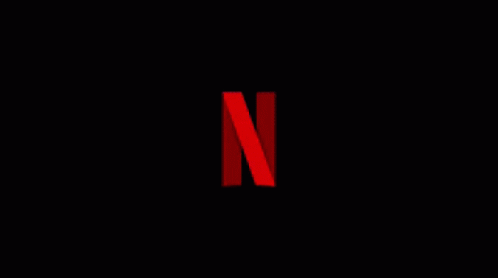

# **Project Summary**
This dataset consist data form 2010 to 2018. Our objective is to conduct an Exploratory Data Analysis to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

After loading the data, we start by observing the first and last five values to understand the dataset. Next, we treat the null values by dropping them if the respective variables contain <1% of null values. This is followed by feature engineering to extract new variables from the datetime variable date_added.

This cleaned data is then used to conduct EDA in order to understand it better and identify the underlying trends.

Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.

Finally, K–Means clustering is utilized to form 10 distinct clusters with similar data points




# **PROBLEM STATEMENT**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings

### **Whats coming in the project......📋**

1. Exploratory Data Analysis (EDA)
2. Understanding the Data
3. Cleaning the Data
4. Feature Engineering
5. Clusters Impanelment
6. Building recommendation system
7. Conclusions
8. Future Scope







# ***Lets Start......!!***

## **Importing Libraries and Modules📚**

In [ ]:
##Importing the requried libraries and modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## **Importing Data** 

In [ ]:
## Mounting drive to acess file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Location path for CSV file

file_path = '/content/drive/MyDrive/Unsupervice Machine Learning Capstone Project Almabetter (Rushikesh Mane)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'


In [ ]:
df_main = pd.read_csv(file_path )
df_main

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

### **Let's see our Dataset** 👀 

In [ ]:
# Checking first five rows
df_main.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# Checking last five rows

df_main.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [ ]:
# Checking shape
df_main.shape

(7787, 12)

In [ ]:
## Checking total rows and columns in the dataset

print("Shape of Dataframe is :" ,df_main.shape , "\n", "Total number of rows in dataset : ",df_main.shape [0], "\n","Total number of columns in dataset : ",df_main.shape [1], "\n",)


Shape of Dataframe is : (7787, 12) 
 Total number of rows in dataset :  7787 
 Total number of columns in dataset :  12 



In [ ]:
## Checking columns

df_main.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
## Checking the info of dataframe and knowing data types of columns.

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Checking Statistic of the data

df_main.describe(include='all').T 

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

In [ ]:
## Checking Duplicate rows in our Dataset.
duplicates=df_main.duplicated().sum()
print(f"We are haveing {duplicates} rows in our Dataframe.")

We are haveing 0 rows in our Dataframe.


### **Insights 📝** 

1. In this dataset we are having 7787 rows and 12 columns provided in the data.

2. Director, Cast, Country, date_added and rating cloumns are contaning null values. In date_added and rating we are having very few null values(10 and 7 respectively) so we will remove them.

3. Not having any duplicates in this data.

### **Let's do some cleaning before going further in data.**🧹

#### **First checking for the null values in the dataset.**

In [ ]:
# Checking null values in the dataset.
df_main.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

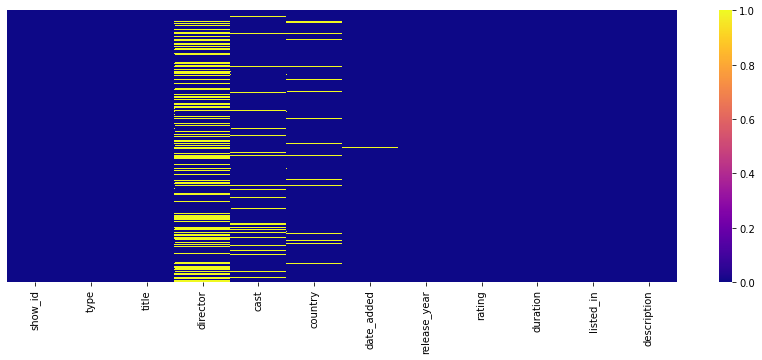

In [ ]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df_main.isnull(),cmap='plasma',annot=False,yticklabels=False)

#### **As we can see, Director, Cast, Country, date_added and rating cloumns are contaning null values.**

##### **First replace few null values.**

In [ ]:
# Number of null values in date_added.
df_main.date_added.isnull().sum()

10

In [ ]:
# Remove null values in date_added.
df_main.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Number of null values in rating.
df_main.rating.isnull().sum()

7

In [ ]:
# Remove null values in rating.
df_main.dropna(subset=['rating'], inplace=True)

In [ ]:
# Check the shape of our data.
df_main.shape

(7770, 12)

### **Huush.......There goes the null values.😃**

In [ ]:
df=df_main
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

#### **As for the rest of the columns containing null values, we will handle them accordingly in future analyses.**

####**Adding few more datetime features.**

In [ ]:
# Create new features to store date, day, month and year seperately.
df_main["date_added"] = pd.to_datetime(df_main['date_added'])  # First convert date_added to date time format.
df_main['day_added'] = df_main['date_added'].dt.day            # Compute day.
df_main['year_added'] = df_main['date_added'].dt.year          # Compute year.
df_main['month_added'] = df_main['date_added'].dt.month        # Compute month.

### **Exploratory Data Analysis📊📉**

In [ ]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

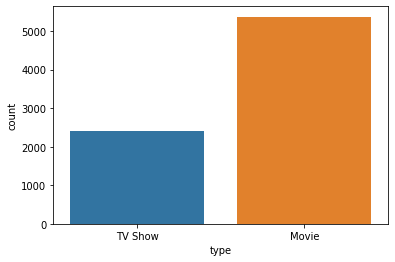

In [ ]:
sns.countplot(df['type'])

In [ ]:
# Installing library for generating static image.
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: kaleido
    Found existing installation: kaleido 0.2.1
    Uninstalling kaleido-0.2.1:
      Successfully uninstalled kaleido-0.2.1


### **Types of Content on NETFLIX**🎬📺

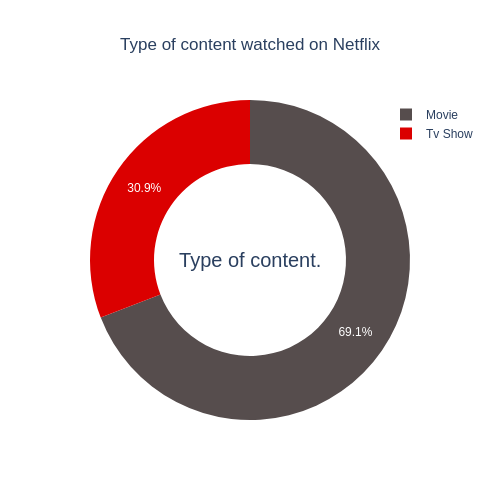

In [ ]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = df_main.type.value_counts()[1]
movie = df_main.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show('png')





#### **From the above pie chart, We can see 69.1% of the content available on NETFLIX are movies, the remaining 30.9% are TV Shows.**

### **Contain added on NETFLIX** 

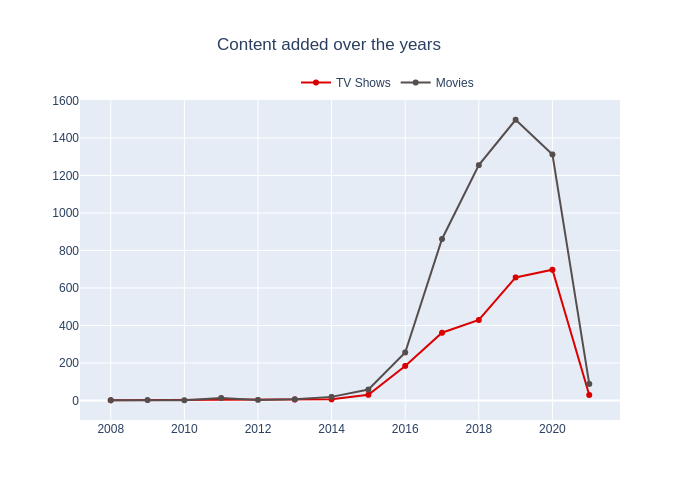

In [ ]:
# Plot growth of the contents over the years.
tv_show = df_main[df_main["type"] == "TV Show"]
movie = df_main[df_main["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)


fig.write_image("images/content_added_over_year.png", scale=5)
fig.show('png')
# fig.show()

In [ ]:
# Check why does it suddenly drop in 2021.
len(df_main[df_main['year_added'] == 2021])

117

### **Insights 📝** 

1. Form past few years number of movies increased and number of TV shows decreased on NETFILX.

2. We can see that form 2015 there is a large increase in number of movies and TV shows uploaded on NETFILX platform.

3. In 2019 to 2020 the highest numbers of show added on NETFILX.

4. The line plot very few movies and TV shows added in 2021. Its due to very little data collected form that year.
(or hamko bhi pata hai COVID ne kya halat kithi movies kahase banti.............😁)

### **Lets see which month having most of the movies and TV shows upload** 📅

In [ ]:
# Create dataframe to store manth values and counts.
months_df = pd.DataFrame(df_main.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'Month', 'month_added':'Count'}, inplace=True)

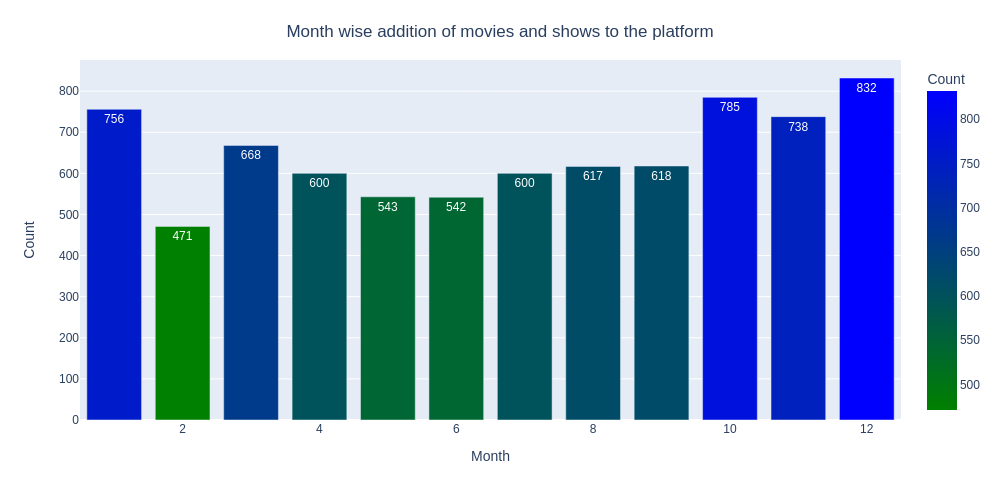

In [ ]:
fig = px.bar(months_df, x="Month", y="Count", text_auto=True, color='Count', color_continuous_scale=['green', 'blue'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)
# fig.show()
fig.show('png')

### **Insights 📝** 

1. The major content is added in starting of the year or ending of the year.

2. In the December more shows are added and least shows added in the month of February.

3. We can see the October, November, December and January are months in which many shows and movies are getting added on NETFLIX.

4. It's because holiday seasons that's why more shows are uploaded on the ending of the year.

5. 

### **More prominent day's**📆

In [ ]:
# Create dataframe to store day values and count.
days_df = pd.DataFrame(df_main.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'Day', 'day_added':'Count'}, inplace=True)

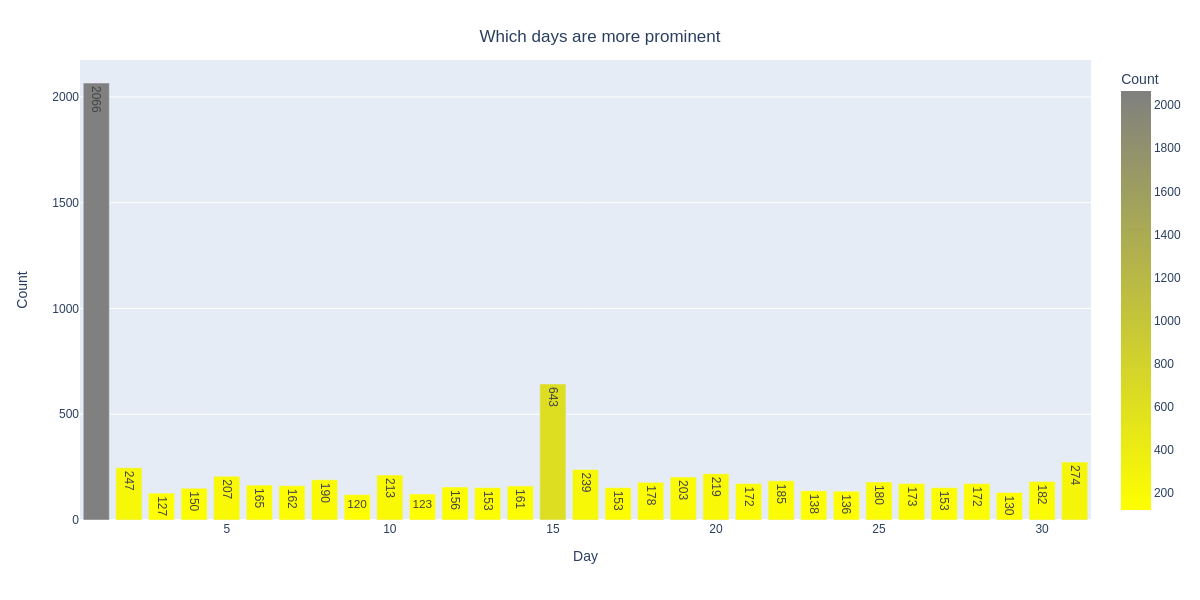

In [ ]:
fig = px.bar(days_df, x="Day", y="Count", text_auto=True, color='Count', color_continuous_scale=['yellow', 'grey'])
fig.update_layout(
    title={
        'text': 'Which days are more prominent',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=600)
# fig.show()
fig.show('png')

### **Insights 📝** 

1. Form the graph we can see most of the content is uploaded on starting of the month.

2. That means 1st , 15th, 31st months are prominent is getting new TV shows and movies.


### **Now let's see how much contribution of each country for the NETFLIX content 🗺**🌏

In [ ]:
# Import dataset containing Contries and their codes.
country_code_df = pd.read_csv('/content/drive/MyDrive/Unsupervice Machine Learning Capstone Project Almabetter (Rushikesh Mane)/Country code.csv', usecols=['Country', 'Code'])

In [ ]:
# Create a dict to store counts of each country appearing in our dataset.
countries = ", ".join(df_main['country'].dropna()).split(", ")
countries_dict = dict(Counter(countries))
countries_dict = dict((key.lower(), value) for key, value in countries_dict.items())

In [ ]:
countries

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'United States',
 'Turkey',
 'Egypt',
 'United States',
 'India',
 'India',
 'United States',
 'Poland',
 'United States',
 'Mexico',
 'Thailand',
 'United States',
 'Nigeria',
 'Norway',
 'Iceland',
 'United States',
 'India',
 'United Kingdom',
 'India',
 'India',
 'India',
 'India',
 'Japan',
 'United States',
 'United States',
 'South Korea',
 'Italy',
 'United States',
 'Canada',
 'Indonesia',
 'Indonesia',
 'United States',
 'Canada',
 'United States',
 'Romania',
 'Romania',
 'Spain',
 'Turkey',
 'Iceland',
 'Turkey',
 'Nigeria',
 'United States',
 'Turkey',
 'United States',
 'United States',
 'South Africa',
 'Nigeria',
 'France',
 'United States',
 'South Africa',
 'South Korea',
 'Spain',
 'United States',
 'Portugal',
 'Spain',
 'United States',
 'United States',
 'Indonesia',
 'United Kingdom',
 'India',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'United States',
 'United States',
 'United S

In [ ]:
countries_dict

{'brazil': 88,
 'mexico': 154,
 'singapore': 39,
 'united states': 3287,
 'turkey': 108,
 'egypt': 110,
 'india': 990,
 'poland': 35,
 'thailand': 65,
 'nigeria': 76,
 'norway': 29,
 'iceland': 9,
 'united kingdom': 721,
 'japan': 285,
 'south korea': 212,
 'italy': 89,
 'canada': 412,
 'indonesia': 80,
 'romania': 12,
 'spain': 215,
 'south africa': 54,
 'france': 349,
 'portugal': 4,
 'hong kong': 102,
 'china': 147,
 'germany': 199,
 'argentina': 82,
 'serbia': 7,
 'denmark': 44,
 'kenya': 5,
 'new zealand': 28,
 'pakistan': 24,
 'australia': 142,
 'taiwan': 85,
 'netherlands': 45,
 'philippines': 78,
 'united arab emirates': 34,
 'iran': 4,
 'belgium': 85,
 'israel': 26,
 'uruguay': 14,
 'bulgaria': 9,
 'chile': 26,
 'russia': 27,
 'mauritius': 1,
 'lebanon': 26,
 'colombia': 45,
 'algeria': 2,
 'soviet union': 3,
 'sweden': 39,
 'malaysia': 26,
 'ireland': 40,
 'luxembourg': 11,
 'finland': 11,
 'austria': 11,
 'peru': 10,
 'senegal': 3,
 'switzerland': 17,
 'ghana': 4,
 'saudi ar

In [ ]:
# Map the country code dataset with countries dict.
country_code_df['Count'] = country_code_df['Country'].map(countries_dict)

In [ ]:
# Country codes df with country counts.
country_code_df.head()

Country Code  Count
0     afghanistan  AFG    1.0
1  ??land islands  ALA    NaN
2         albania  ALB    1.0
3         algeria  DZA    2.0
4  american samoa  ASM    NaN

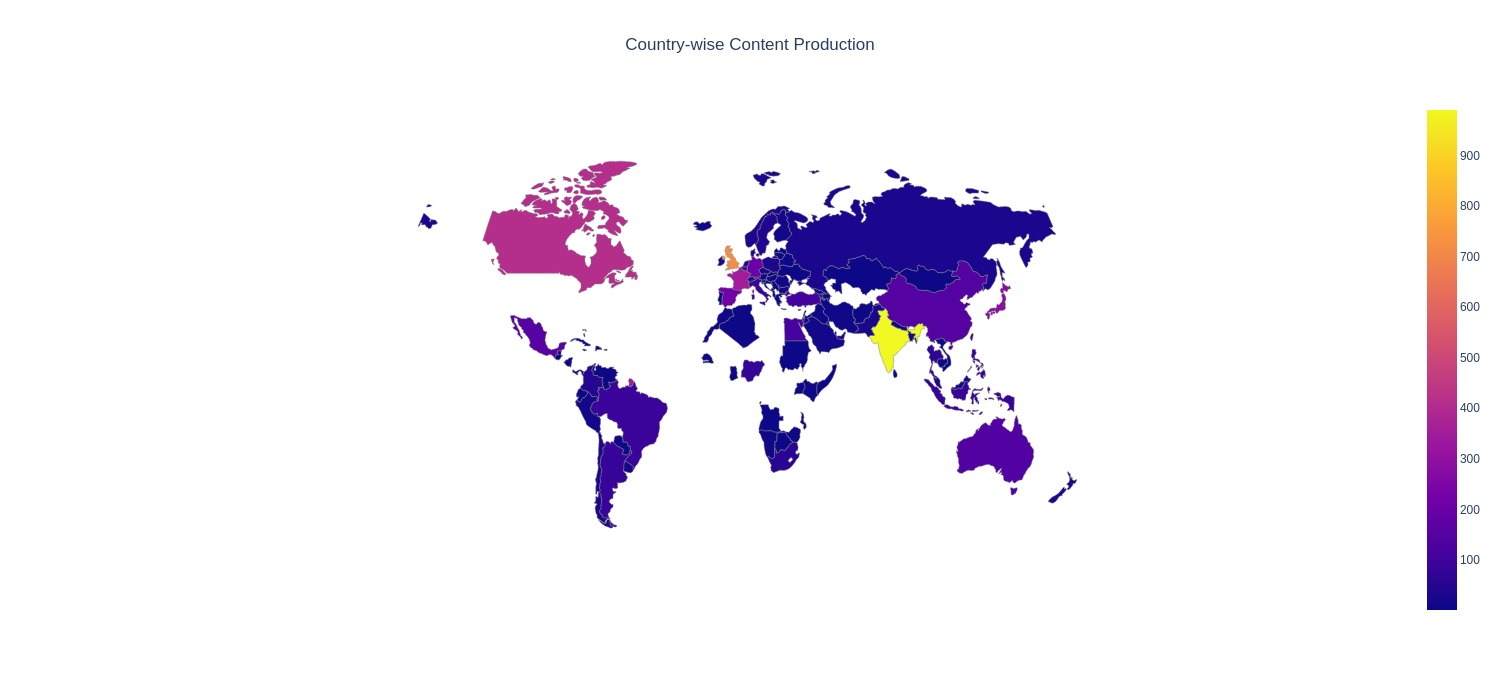

In [ ]:
# Create Geo plot to see which country produces more content.

# Define data
data = dict(type='choropleth', 
            locations = country_code_df['Code'], 
            z = country_code_df['Count'], 
            text = country_code_df['Country'],
            marker = dict(line = dict (color = 'grey',width = 0.5)),
            # colorbar = dict(autotick = True, title = '')
            )

# Define layout.
layout = dict(title = 'Country-wise Content Production', title_x=0.5,height=700, width=1500,
              geo = dict( projection = {'type':'times'},
                         showlakes = False,
                         showcoastlines = False,
                         showframe = False, 
                         showocean = False,
                         showland = False,
                         fitbounds = 'locations',
                         ))

# Plot it.
country_plot = go.Figure(data = [data], 
              layout = layout
              )
# iplot(country_plot)
country_plot.show('png')

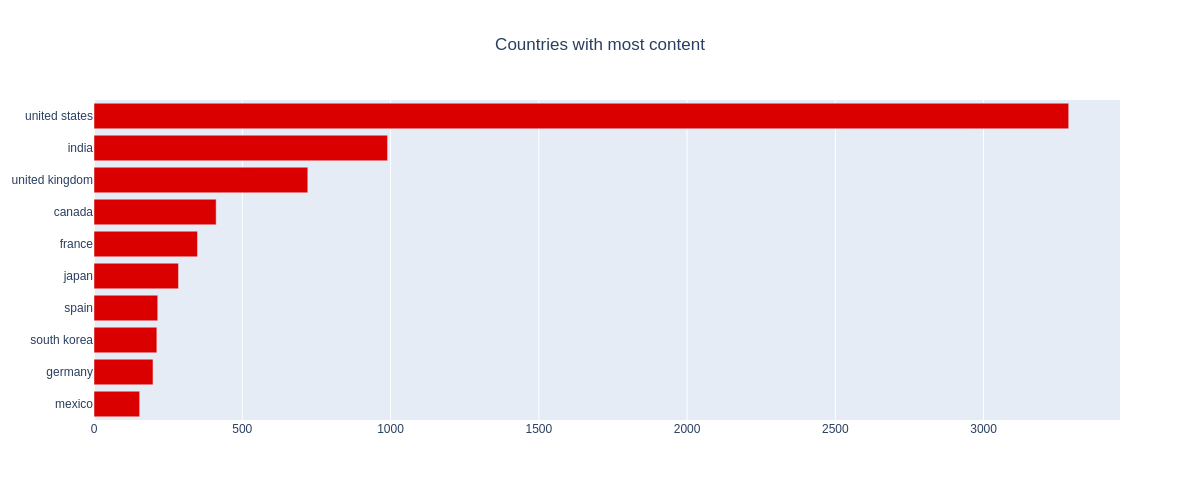

In [ ]:
# Lets find the top ten countries that produce most of the content.
top_ten = Counter(countries_dict).most_common(10)

country = [_[0] for _ in top_ten][::-1]
count = [_[1] for _ in top_ten][::-1]
trace1 = go.Bar(y=country, x=count, orientation="h", name="", marker=dict(color='#db0000'))

data = [trace1]
layout = go.Layout(title="Countries with most content", title_x = 0.5, height=500, width=1200, legend=dict(x=0.5, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
# fig.show()
fig.show('png')  

### **Insights 📝** 
1. USA, INDIA and UK are the leading countries which produce more than half of content which are till present on NETFLIX.


### **Seeing yearwise release of content on this platform** 

In [ ]:
# Put the data into bins.
release_yr_bin = pd.cut(df_main.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

year_interval  count
0  (2010, 2021]   6425
1  (1999, 2010]    896
2  (1924, 1999]    449

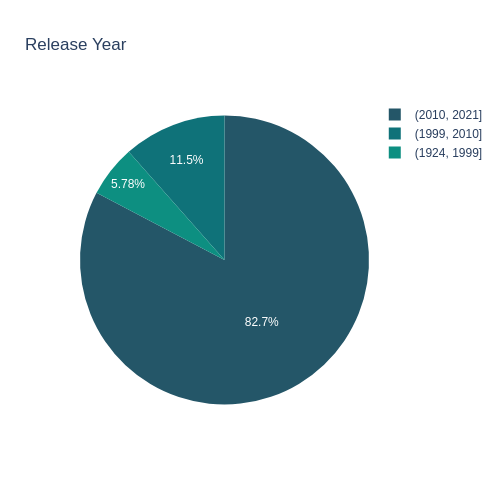

In [ ]:
# Plot it.
fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=px.colors.sequential.Aggrnyl, title='Release Year', height=500, width=500)
# fig.show()
fig.show('png')

### **Insights 📝** 

1. More content add on year 2010 and 2021 i.e. 82%.

2. The least content added on year 2010 i.e. 17.28%.

## **Title:**🎬

### **Creating  wordcloude to see which words appear the most in the titles for movies and TV shows.**

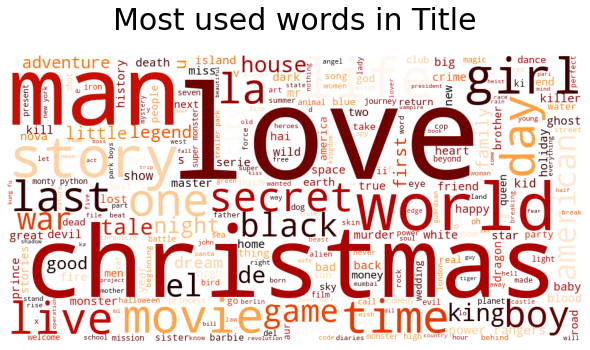

In [ ]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS 

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df_main.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in Title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Insights 📝** 

1. In all of the NETFLIX content Christmas, Love, World, Man and Story are most repeated words in titles. ( Because we can see form the last barchart most of the content are form US its kind of obvious)

2. We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

## **Description: 📋**

### **Similarly create wordcloud for description to see which words appear the most.**

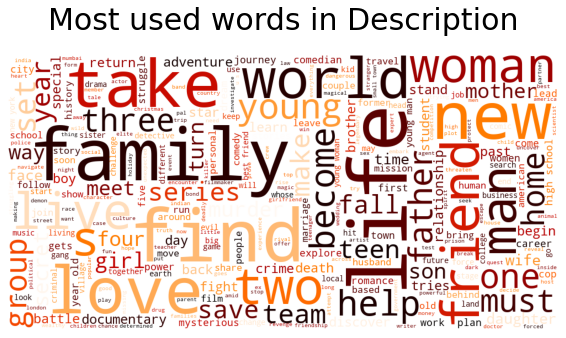

In [ ]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df_main.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in Description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Insights 📝** 

1. The most occurring words in the description of the TV shows and Movies are Family, Friend, Love, Life, Women, Man.

## **Director:**🎥😎

### **Lets see which director have most number of the movies and TV shows**.

In [ ]:
# Replace the null values in director.
df_main['director']=df_main['director'].fillna('')

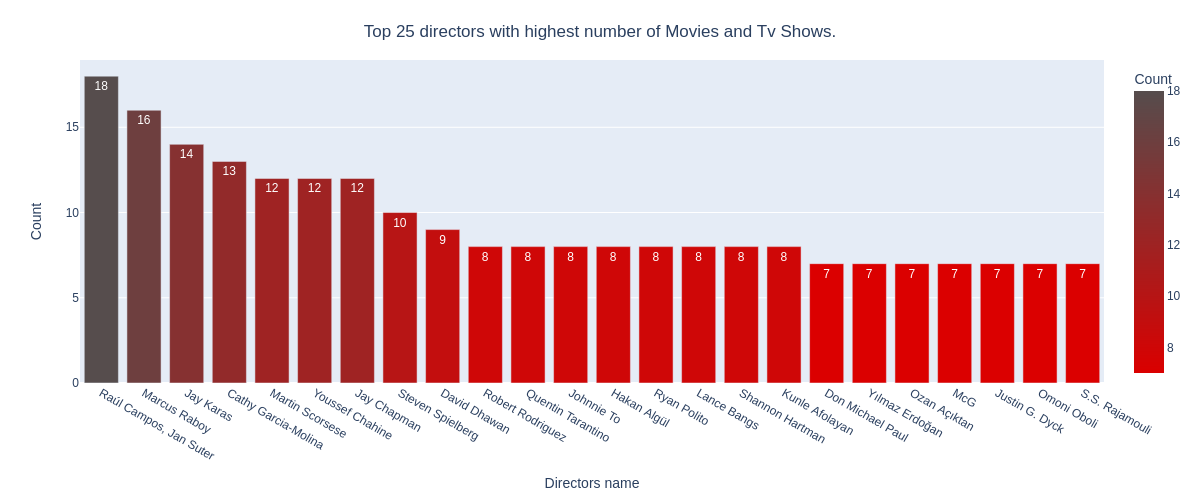

In [ ]:
directors_list = df_main.director.value_counts().reset_index().head(25)[1:]  # We will not include the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#db0000', '#564d4d'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

### **Insights 📝** 

1. Top 5 directors having highest number of movies and TV shows are Raul Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman. 

## **Cast:**

**Do these movies have our favourite actors ?**

In [ ]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [ ]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df_main)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.

In [ ]:
actor_list.head(10)

index   0
1294        Anupam Kher  38
194    Takahiro Sakurai  28
2203            Om Puri  27
4039     Shah Rukh Khan  27
740         Boman Irani  25
2506       Paresh Rawal  24
8462      Andrea Libman  24
4368          Yuki Kaji  23
4994       Vincent Tong  22
2201       Akshay Kumar  22

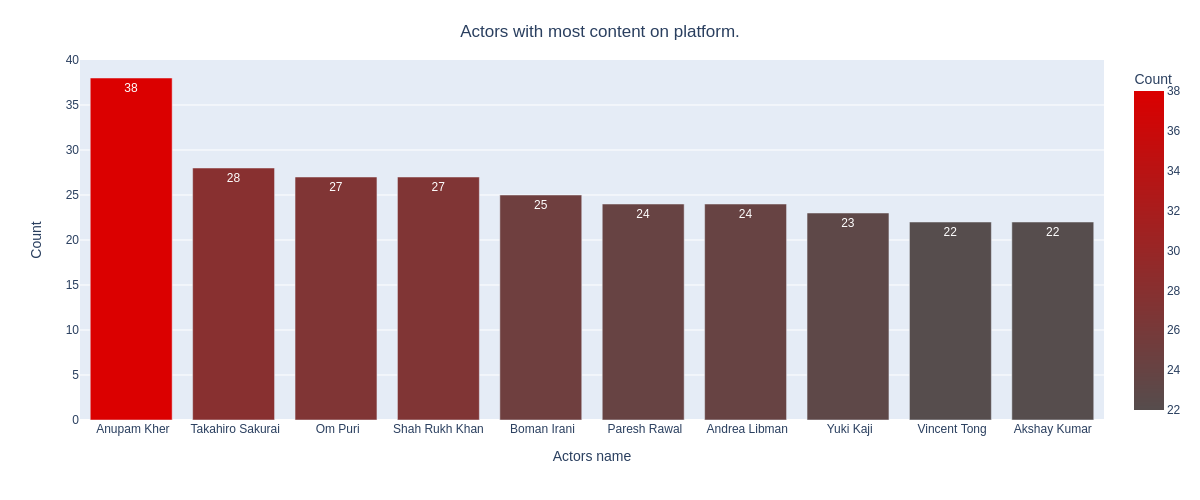

In [ ]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

### **Insights 📝** 

Here we can see that top 10 actors are indians in TV shows and movies.( Happy to see this result 🤩😃 )

In [ ]:
# Replace the null values in cast.
df_main['cast']=df_main['cast'].fillna('')

### **Let's see which kind of content are available in different countries in recent years** 🌏

In [ ]:
country_null_values = df_main.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')

We had observed that variable country had 505 null values in it, we will replace these null values with the most occurring country which is United States.


In [ ]:
''' Since there are many countries, we will take the top ten countries that produce
     content and see what type of content these countries provide the most?'''

df_main['country'].fillna('United States', inplace=True)
df_main['country_single'] = df_main['country'].apply(lambda x: x.split(",")[0])
country_order = df_main['country_single'].value_counts()[:10].index
countryVScontent = df_main[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type           index   Movie  TV Show
0      United States  2326.0   1053.0
1              India   883.0     73.0
2     United Kingdom   341.0    235.0
3             Canada   175.0     84.0
4              Japan    75.0    160.0
5             France   137.0     59.0
6        South Korea    42.0    152.0
7              Spain   119.0     49.0
8             Mexico    79.0     44.0
9          Australia    56.0     50.0

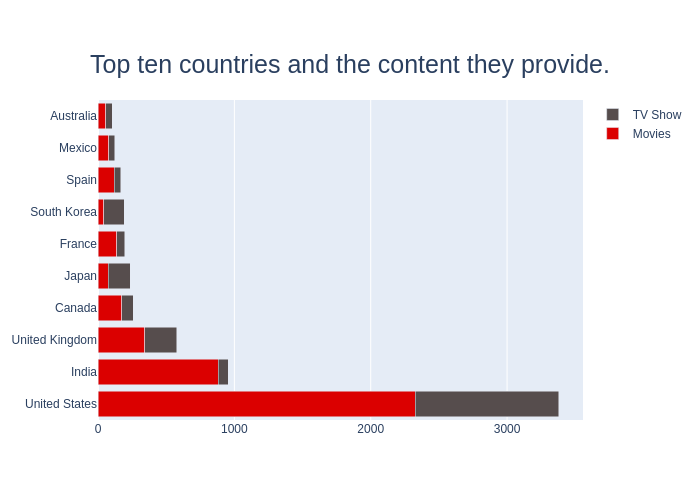

In [ ]:
# Plot the above data.
fig = go.Figure()
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(
        color='rgba(219, 0, 0, 1)'
    )
))
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='rgba(86, 77, 77, 1)'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
# fig.show()
fig.show('png')

### **Insights 📝** 
 
 1. As we can see the United States are the major contributer for producing both type of content. Its obvious because NETFLIX is US based company.

 2. The second most contributer to the conetent is india on NETFLIX. But you can see there is bollywood is more focused on movies rather than TV shows. 
 (in this data we are missing some new data and according to me the preception about TV shows is changeing i thing more and more TV shows are coming INDIA.)
 
 
 3. On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays

### **Popular Genre in these Countries** 

In [ ]:
# Create subset of dataset with required data.
conuntryVSgenre = df_main[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

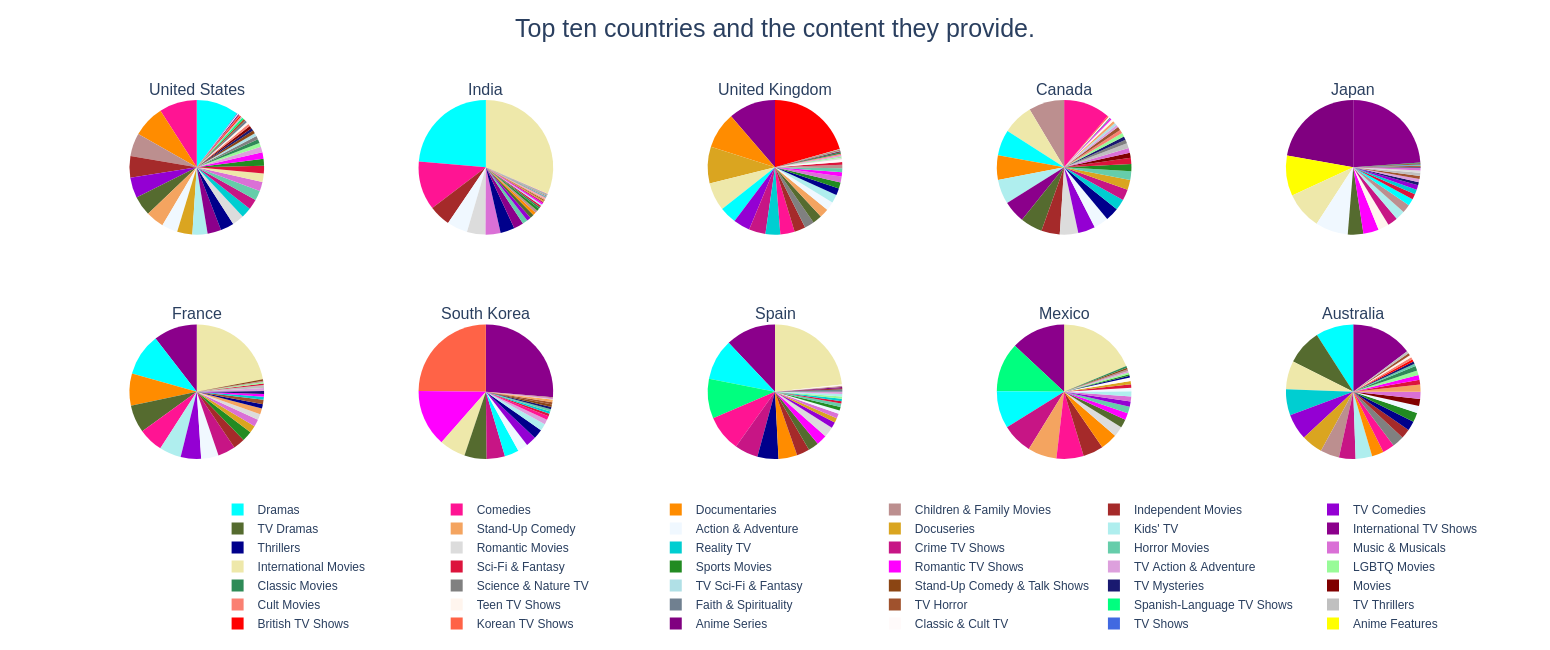

In [ ]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show('png')

### **Insights 📝** 

1. The most popular choice of genre is Drama, International Movies and Comedies.

2. British and International TV shows are dominate in the UK.

3. Regional specialties such as Anime in Japan and Korean Tv shows in South Korea are more prominent in these countries; This makes sense as anime has always been popular in Japan, and the rising k-pop culture explains the increase in Korean Tv Shows.

4. Its really suprising that where the english is not a regional language demand of International TV shows and Movies are high.

### **Hypothesis Testing**

Is NETFLIX has increasingly focusing on TV rather than movies in recent years ?

Here we are testing that is there any relation between the year(year_added) of that content added with the type of the content(type). 

⇛ Null Hypothesis: year_added has no impact on type of content that getss added to the platform.
⇛Alternative Hypothesis: year_added has impact on type of content that gets added to the platform.



In [ ]:
hypo_data = pd.crosstab(df_main['type'], df_main['year_added'], margins=False)
hypo_data

year_added  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
type                                                                           
Movie          1     2     1    13     3     6    19    58   256   861  1255   
TV Show        1     0     0     0     0     5     6    30   184   361   429   

year_added  2019  2020  2021  
type                          
Movie       1497  1312    88  
TV Show      656   697    29

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

7.478336952750899e-11

### **Here we can see the p-value is greater than 0.05, so we reject null hypothesis. So we conclude that there is a impact of year_added on the type of content.**

# **Additon of Genre** 📝

In [ ]:
# Now lets check what type of content got added in the past few years.

'''We will only check for the type of genres that got added in the years 2018-2021 for better visualization. '''

# Create subset of data with required columns.
recent_years = pd.DataFrame(df_main.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)

''' There are many rows with multiple genre entries therefore we will
 create a function to split each of them and get their respective counts.'''
 
def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
yr_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
yr_genre_count_list = {}
for i in yr_list:
  data = seperate_all_genre(i)
  yr_genre_count_list[i] = data
  yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
  yr_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

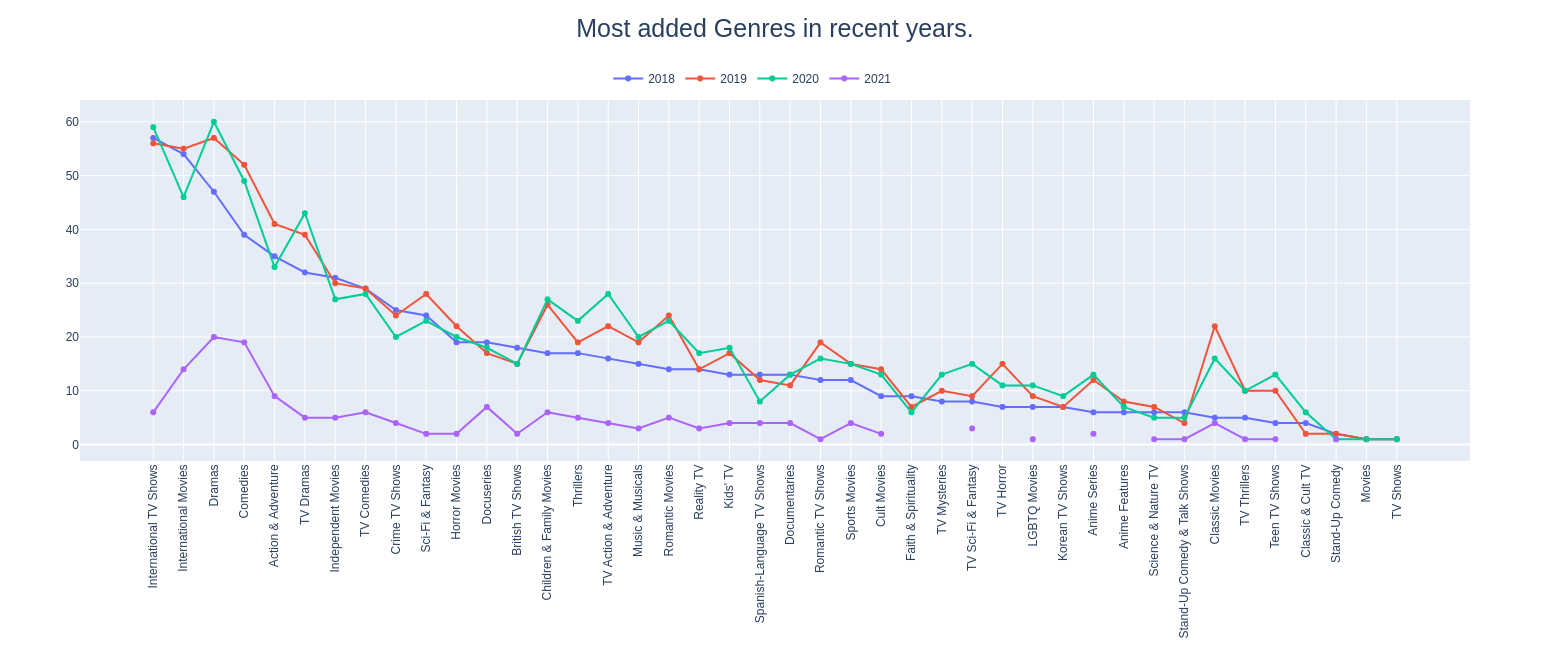

In [ ]:
# Plot the above data.
df = yr_genre_count_df.sort_values([2018,2019,2020,2021],ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[2018], x=df['Genre'],
                    mode='lines+markers',
                    name=2018))
fig.add_trace(go.Scatter(y=df[2019], x=df['Genre'],
                    mode='lines+markers',
                    name=2019))
fig.add_trace(go.Scatter(y=df[2020], x=df['Genre'],
                    mode='lines+markers', 
                    name=2020))
fig.add_trace(go.Scatter(y=df[2021], x=df['Genre'],
                    mode='lines+markers', 
                    name=2021))
fig.update_xaxes(tickangle=-90)
fig.update_layout(title={'text': 'Most added Genres in recent years.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,legend=dict(x=0.38, y=1.1, orientation="h"))

# fig.show()
fig.show('png')

### **Insights 📝**

1. Form the graph we can see that NETFLIX has added so much international TV shows (or we can say them web series), TV Dramas, TV Comedy shows and many more in the recent years.

2. The addition of all content are widely diversifi 
 IN the recent years NETFLIX is rapidly increasing and diversifying the content to attract more and more audiance. 

### **Duration** ⏲

In [ ]:
# Create subsets for tv shows and movies.
tv_shows = df_main[df_main['type'] == 'TV Show']
movies = df_main[df_main['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

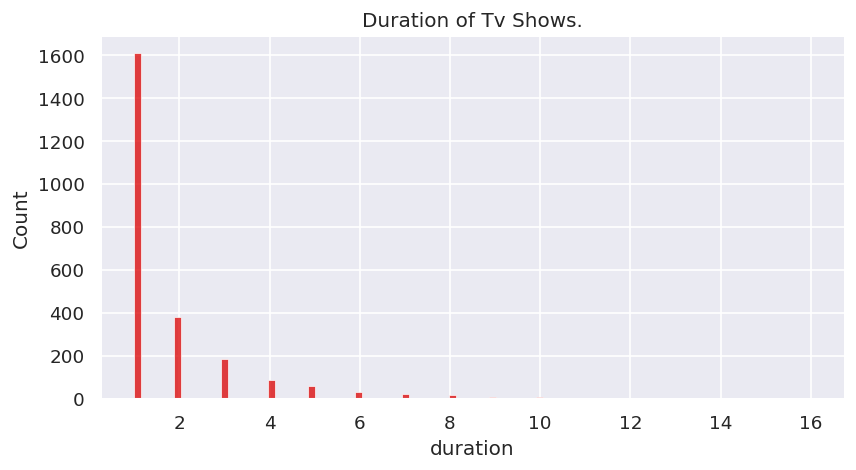

In [ ]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()

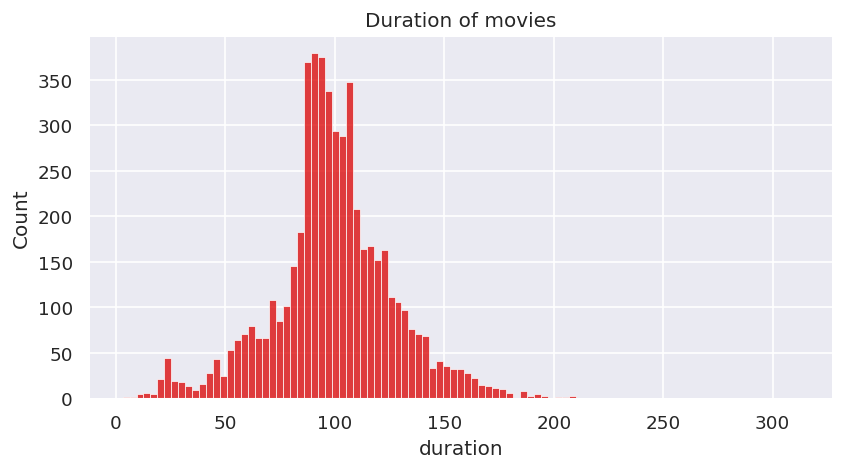

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

### **Insights 📝**

1. The most of content on NETFLIX is about to 90 to 120 minutes.

### **Rating** 🌟🌟

*Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children.Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.*


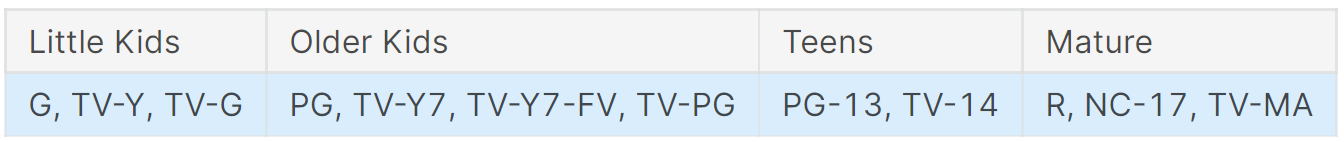




In [ ]:
movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_shows['rating'].value_counts())

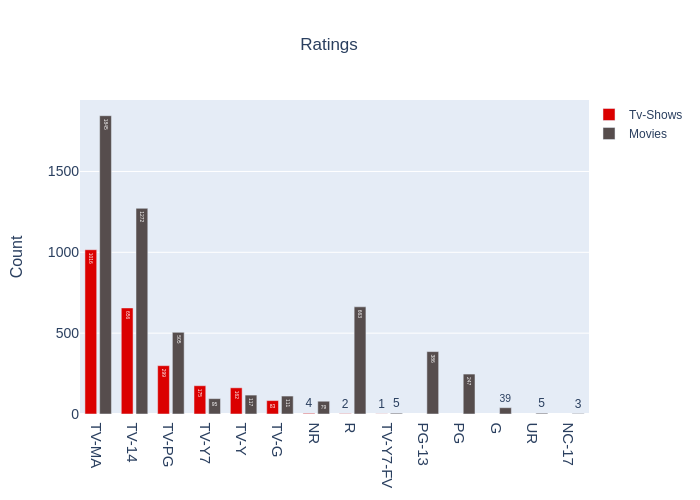

In [ ]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2 
)
# fig.show()
fig.show('png')

### **Insights 📝**

1. TV-MA is the first in the chart so we can say that the most of the content is available on NETFLIX is TV-MA. ( TV-MA means Mature Audience Only This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17) 

2. The the other major content is in TV-14 and TV-PG thats all content is more focused on Teens and Older kids. ( TV-14 is these shows may be unsuitable for children under 14 and TV-PG is parental guidance is recommended; these programs may be unsuitable for younger children )

3. NC-17 content is least available on NETFLIX.

# **Correlation Heatmap......**

In [ ]:
df_main.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added country_single  
0            8         Brazil  
1           12         Mexico  
2           12      Singapore  
3           11  United States  
4            1  United States

In [ ]:
Flix_df=df_main

In [ ]:
Flix_df['principal_country'] = Flix_df['country'].apply(lambda x: x.split(",")[0])
Flix_df['principal_country'].head()

country_order = Flix_df['principal_country'].value_counts()[:11].index
content_data = Flix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [ ]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
Flix_df['age_rating'] = Flix_df['rating'].replace(rating_ages)
Flix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [ ]:
Flix_df['count'] = 1
data = Flix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = Flix_df.loc[Flix_df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['age_rating'],normalize = "index").T
Flix_df_heatmap

principal_country    Canada    France     India     Japan    Mexico  \
age_rating                                                            
Adults             0.467181  0.627551  0.259414  0.365957  0.764228   
Kids               0.150579  0.086735  0.015690  0.008511  0.016260   
Older Kids         0.220077  0.112245  0.163180  0.276596  0.089431   
Teens              0.027027  0.030612  0.004184  0.012766  0.016260   
Young Adults       0.135135  0.142857  0.557531  0.336170  0.113821   

principal_country  South Korea     Spain    Turkey  United Kingdom  \
age_rating                                                           
Adults                0.463918  0.797619  0.547170        0.526042   
Kids                  0.046392  0.035714  0.009434        0.078125   
Older Kids            0.123711  0.053571  0.094340        0.184028   
Teens                 0.000000  0.017857  0.000000        0.071181   
Young Adults          0.365979  0.095238  0.349057        0.140625   

principal_country  United States  
age_rating                        
Adults                  0.463155  
Kids                    0.089080  
Older Kids              0.202131  
Teens                   0.084640  
Young Adults            0.160994

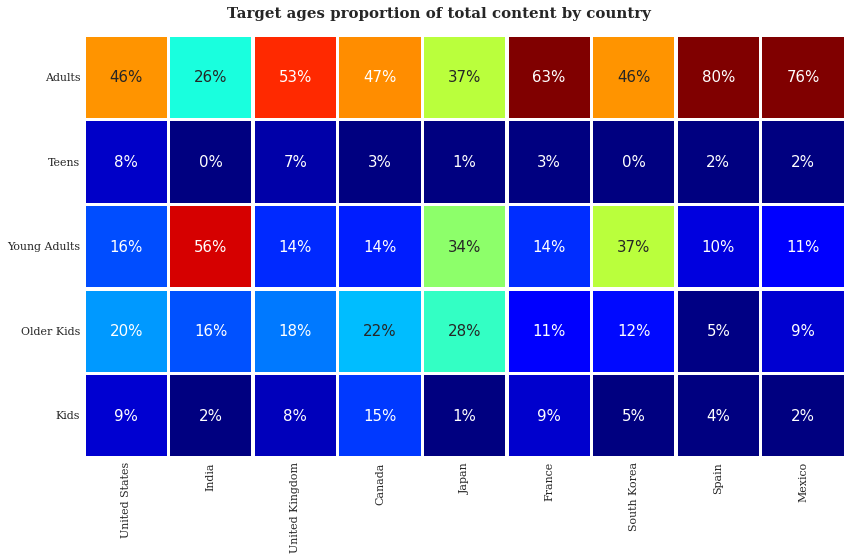

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### **Insights 📝**

1. It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

2. Also, Mexico and Spain have similar content on Netflix for different age groups.


## **Data Prepeocessing:**

### **We will be using text columns to create clusters for our data.**

In [ ]:
cluster_df = df_main[['title']]
cluster_df['cluster_data'] = (df_main['description'] + ' ' + df_main['listed_in'] + ' ' + df_main['director'] + ' ' + df_main['cast'] + ' ' + df_main['country'] + ' ' + df_main['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### **Removing Punctuations**
Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [ ]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...

####**Removing Stopwords and Lower Casing.**

Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

**Stop words** are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

**Lowercasing words** is the process of converting all the words in a text to lowercase. This is a common pre-processing step in NLP tasks, as it can be useful for a few reasons:
1. Case differences can be ignored: By lowercasing the words, you can treat words with different capitalization as the same word, which can be useful in tasks such as information retrieval or text classification where case differences are not important.
2. Vocabulary size is reduced: Lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

cluster_data
title                                                   
3%     futur elit inhabit island paradis far crowd sl...
7:19   devast earthquak hit mexico citi trap survivor...

In [ ]:
bag_of_words = cluster_df.cluster_data

### **Creating Clusters:**

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7770, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

### **Let's Perfoem Dimensinality Reduction**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

In [ ]:
pca = PCA()
pca.fit(X.toarray())

PCA()

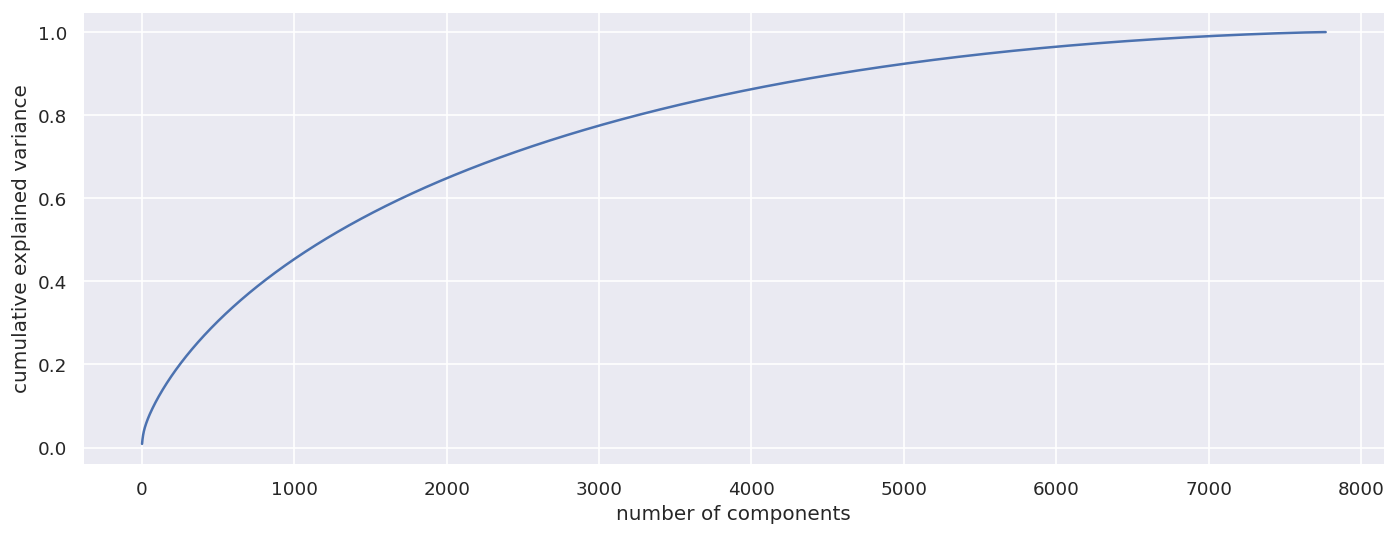

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* ***We can see from the above plot almost 95% of the variance can be explained by 5000 components.***
* ***Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.***

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5591)

In [ ]:
X_transformed

array([[ 0.12381384,  0.01878768, -0.01985089, ..., -0.01290126,
        -0.0061675 ,  0.00134415],
       [-0.03957416,  0.03685093, -0.00068804, ...,  0.01741727,
        -0.00170697,  0.00722743],
       [-0.04426074,  0.04240966, -0.03652511, ...,  0.00155654,
         0.00456558, -0.00629564],
       ...,
       [-0.08081921, -0.0809065 ,  0.27382203, ...,  0.00364216,
        -0.00489299,  0.01251322],
       [ 0.10148378, -0.00405508,  0.01560673, ..., -0.00551716,
        -0.01236381,  0.01055393],
       [-0.09251356, -0.20593119,  0.35063681, ..., -0.00786756,
         0.00438817,  0.00044112]])

### **Get optimum K value using Metric:Shilhouette.**

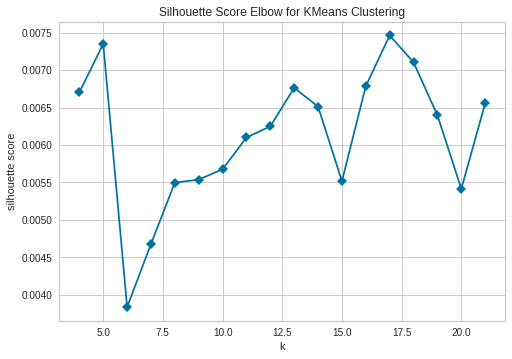

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.0047721176143510746


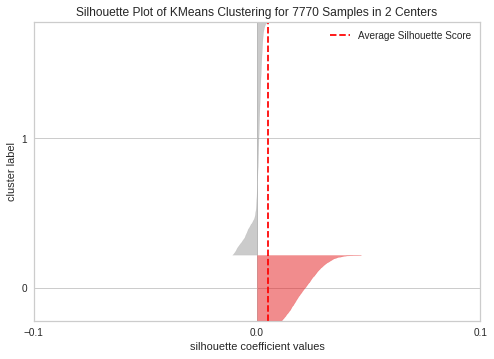

For n_clusters = 3, silhouette score is 0.005919120526288965


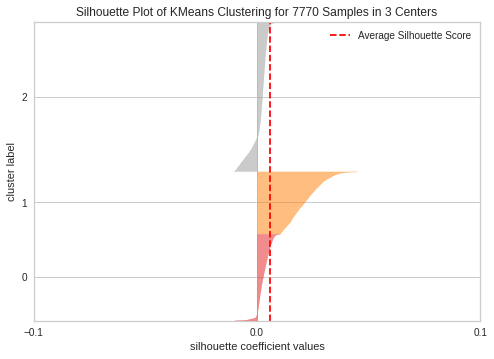

For n_clusters = 4, silhouette score is 0.00670274740576397


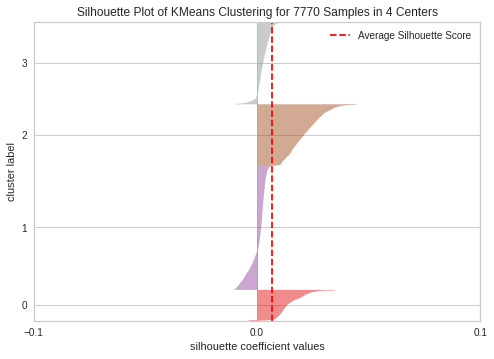

For n_clusters = 5, silhouette score is 0.007350213894115626


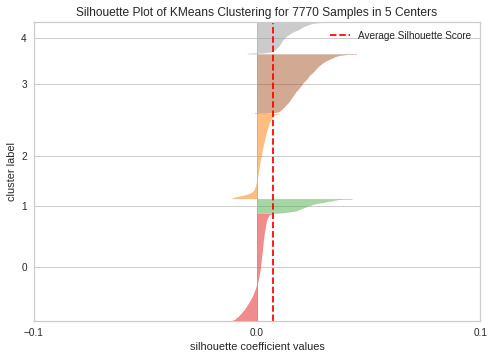

For n_clusters = 6, silhouette score is 0.003833635359469857


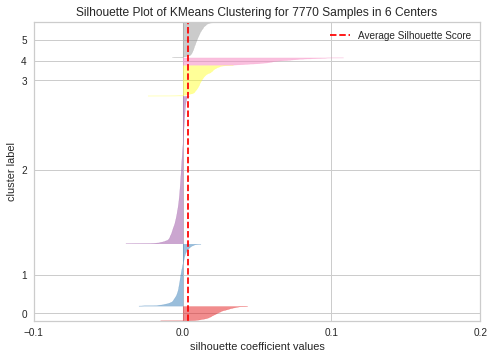

For n_clusters = 7, silhouette score is 0.00467803783104266


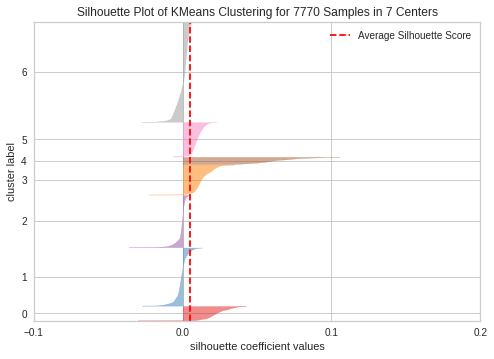

For n_clusters = 8, silhouette score is 0.00549681474120132


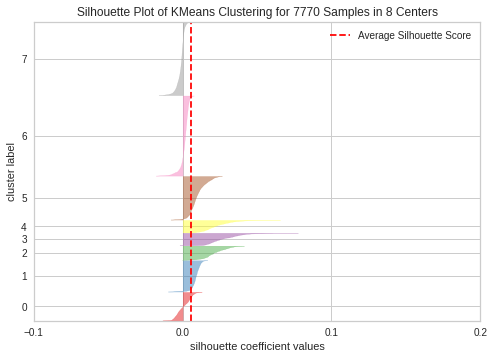

For n_clusters = 9, silhouette score is 0.005538054493019302


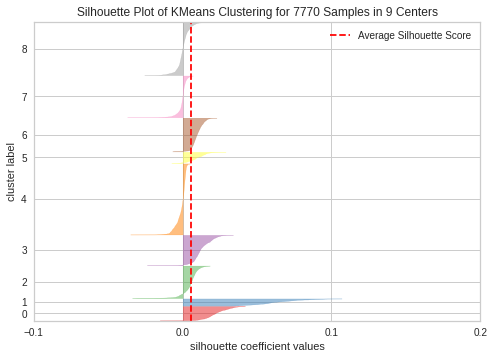

For n_clusters = 10, silhouette score is 0.005675363522968466


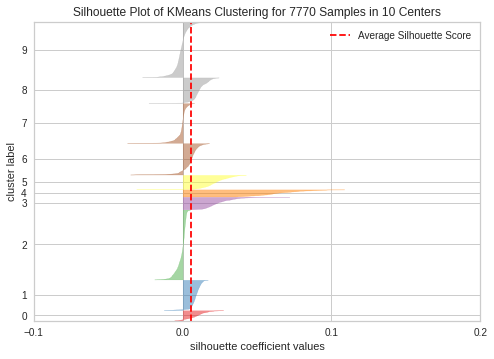

For n_clusters = 11, silhouette score is 0.006100011712560611


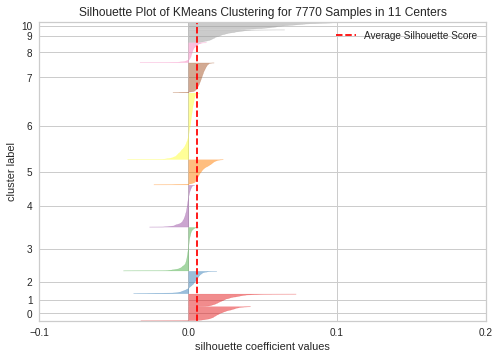

For n_clusters = 12, silhouette score is 0.006249400404526546


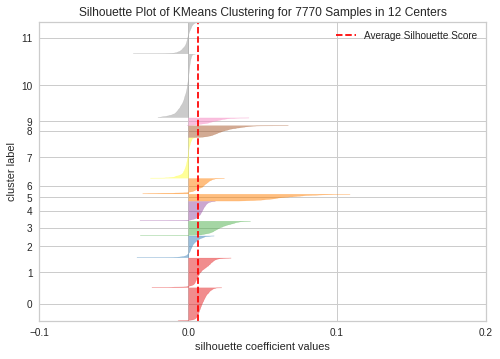

For n_clusters = 13, silhouette score is 0.006763514456040729


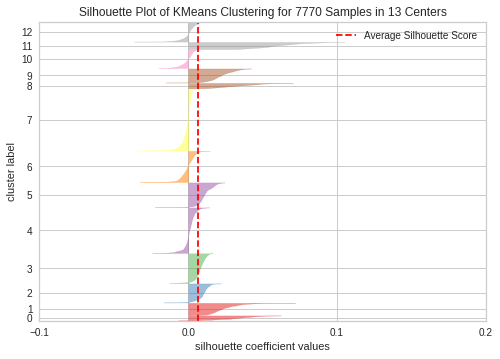

For n_clusters = 14, silhouette score is 0.006511523549925806


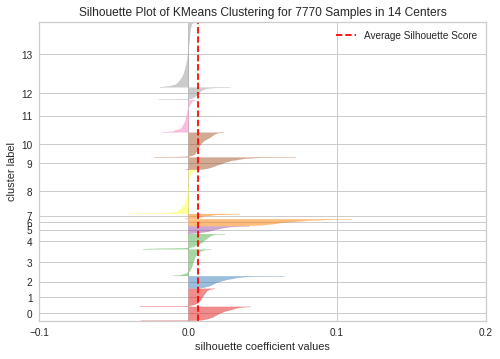

For n_clusters = 15, silhouette score is 0.005516143087294644


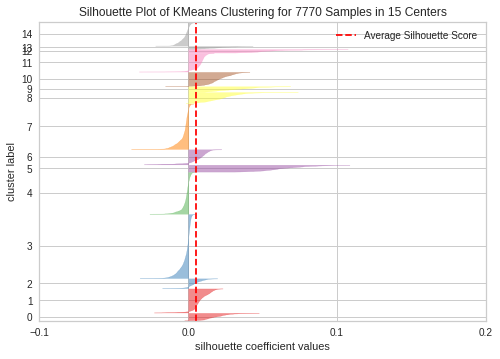

For n_clusters = 16, silhouette score is 0.006786074313056253


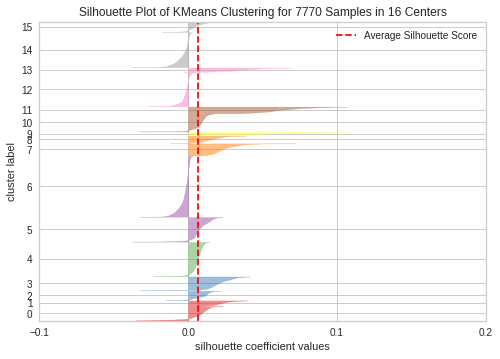

For n_clusters = 17, silhouette score is 0.007462935859315744


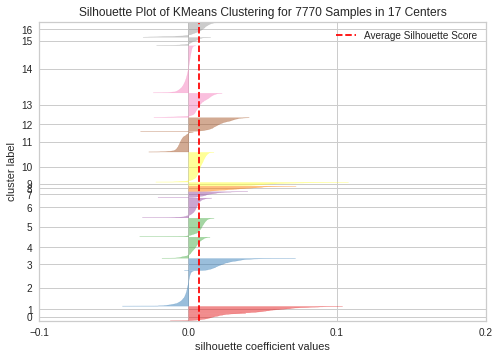

For n_clusters = 18, silhouette score is 0.0071030398309007165


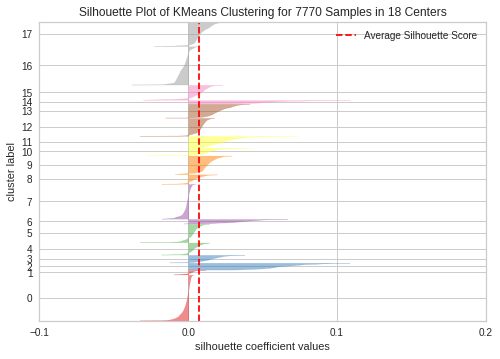

For n_clusters = 19, silhouette score is 0.006396283888182606


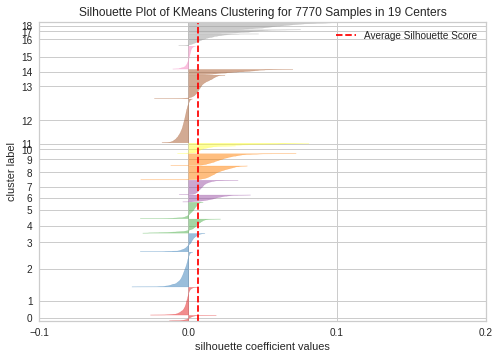

For n_clusters = 20, silhouette score is 0.005414776619067895


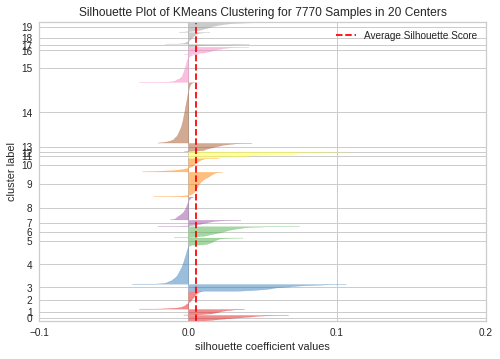

For n_clusters = 21, silhouette score is 0.0065541615624685


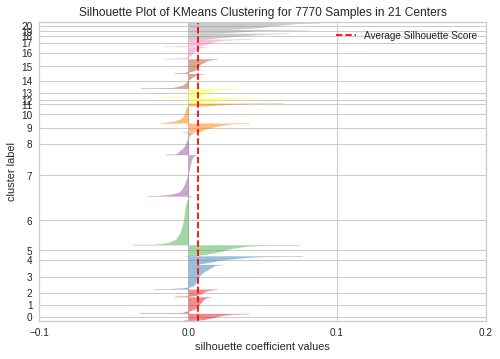

In [ ]:
silhouette_score_analysis(22)

### **Elbow method to find optimum k value:**

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

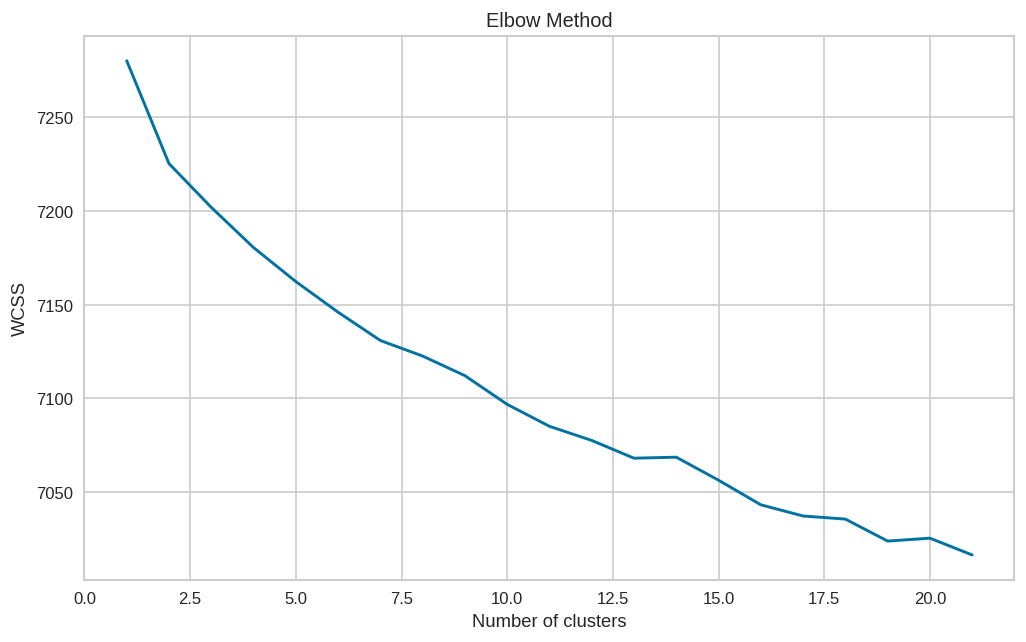

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## **Perform Clustering considering k=10.**

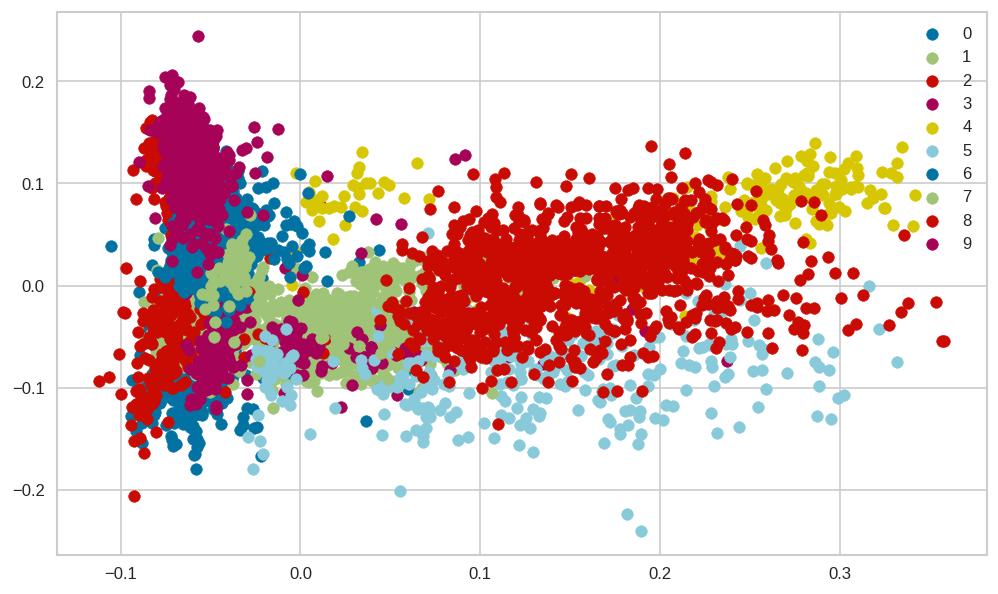

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df_main['cluster_number'] = kmeans.labels_

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df_main[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

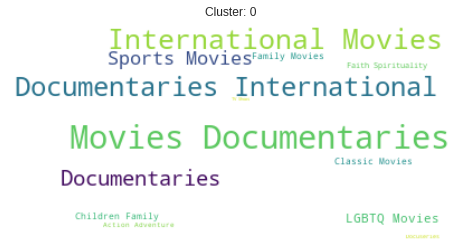

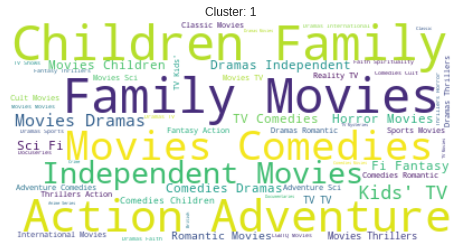

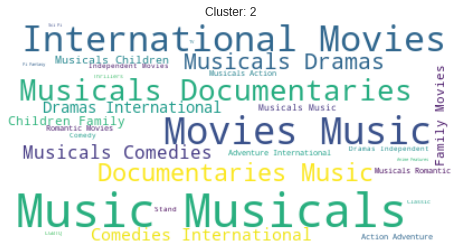

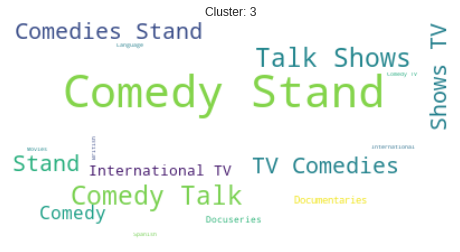

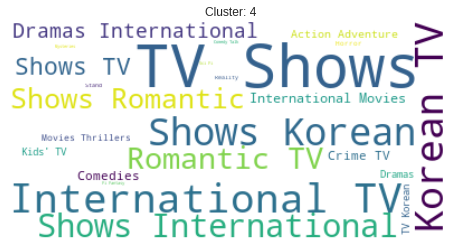

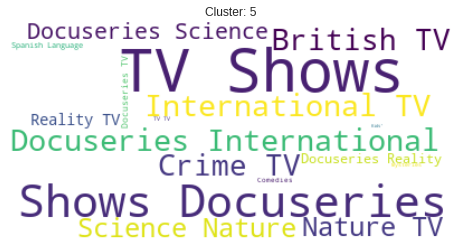

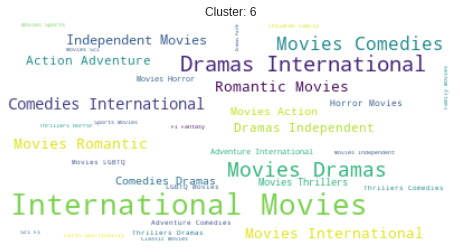

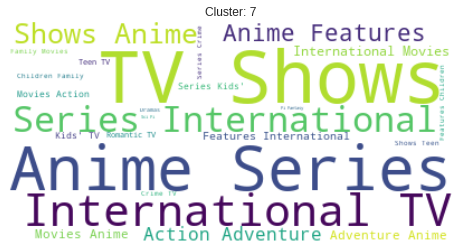

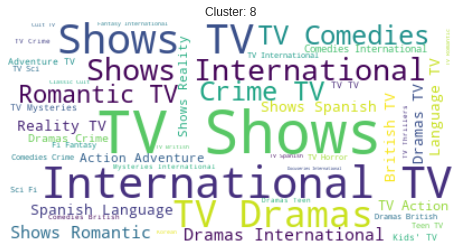

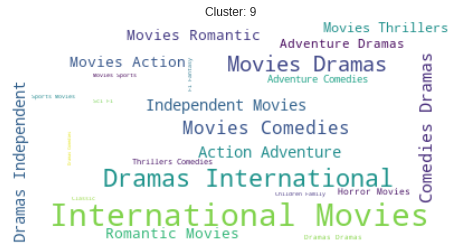

In [ ]:
for i in range(10):
  func_select_Category(i,'listed_in')

# **Get Recommendations:**

* We can build a simple content based recommender system based on the similarity of the shows.
* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
* To get the similarity score of the shows, we can use cosine similarity
* The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

\begin{align}
        Cos(\theta) = \frac{A\ .\ B}{|A|\ .\ |B|}
    \end{align}

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.05131566, 0.01994169, ..., 0.00533143, 0.02253936,
        0.00320396],
       [0.05131566, 1.        , 0.00549713, ..., 0.05254157, 0.0020932 ,
        0.00369168],
       [0.01994169, 0.00549713, 1.        , ..., 0.00758132, 0.00209997,
        0.        ],
       ...,
       [0.00533143, 0.05254157, 0.00758132, ..., 1.        , 0.00288681,
        0.20715934],
       [0.02253936, 0.0020932 , 0.00209997, ..., 0.00288681, 1.        ,
        0.02478001],
       [0.00320396, 0.00369168, 0.        , ..., 0.20715934, 0.02478001,
        1.        ]])

In [ ]:
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [ ]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

Recommendations
0                      Bad Boys II
1                        GoldenEye
2                    Tortilla Soup
3  Martin Lawrence Live: Runteldat
4                  War on Everyone
5                  Madam Secretary
6                        Slow West
7                 Operation Odessa
8            Tremors 5:  Bloodline
9                     Act of Valor

In [ ]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

Recommendations
0  13 Reasons Why: Beyond the Reasons
1                       The Staircase
2                  Unsolved Mysteries
3                           Mind Game
4                            The Mist
5                   Twice Upon A Time
6                     We Are the Wave
7                             Re:Mind
8                    Super Dark Times
9                                 Cam

# **Conclusions:**

* ***It was interesting to find that majority of the content available on Netflix is Movies.***
* ***But in the recent years it has been focusing more on Tv-Shows.***
* ***Most of these contents are released either in the year ending or the beginning.***
* ***United States and India are among the top 5 countries that produce all of the available content on the platform.***
* ***Also 6 of the actors among the top ten actors with maximum content are from India.***   
* ***TV-MA tops the charts, indicating that mature content is more popular on Netflix.***
* ***k=10 was found to be an optimal value for clusters using which we grouped our data into 10 distinct clusters.***
* ***Using the given data a simple recommender system was created using cosine_similarity and recommendations for Movies and Tv Shows were obtained.***


# **Future Scope:**

* ***Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.***
* ***More time could be given into building a better recommender system, which later can be deployed on web for usage.***


# **References:**
1. GeekforGeeks
2. Towards data science
3. Analytics Vidhya
4. Kaggle
5. W3 school
6. Stackoverflow

# **Hussssh........WE COMPLETED THE PROJECT.......GREAT GUYS.....😊😎**